In [5]:
'''
Explain the dataset and the type of information you wish to gain by applying a classification method.
The data is from the Kaggle website; however, the source is  Crowdflower's Data for Everyone library. The data contains information about Twitter's sentiments about airlines. 
The variables of the data are: tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, and user_timezone.
This sentimental analysis aims to build a model using Naive Bayes Algorithm that can predict airline sentiments. 
'''

"\nExplain the dataset and the type of information you wish to gain by applying a classification method.\nThe data is from the Kaggle website; however, the original source of the data is  Crowdflower's Data for Everyone library. The data contains information about Twitter's sentiments about airlines. \nThe variables of the data are: tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, and user_timezone.\nThe goal of this sentimental analysis is to build a model using Naive Bayes Algorithm that can predict airline sentiments. \n"

In [40]:
'''Explain the Naive Bayes algorithm and how you will use it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).

A Naive Bayes algorithm is a machine learning algorithm that helps to predict class datasets. The model is based on Bayes's Theorem (Chauhan, 2022). There are three naive Bayes 
algorithms: Gaussian, Multinomial, and Bernoulli. The Gaussian Naive Bayes Algorithm assumes that data features
follow a normal distribution. The multinomial algorithm assumes that features follow a multinomial distribution. The Bernoulli algorithm is similar to a multinomial 
however, in Bernoulli; predictor variables are independent Boolean variables. 
Steps for Implementing Bayes Algorithm; 

Data Pre-processing step
Fitting Naive Bayes to the Training Set
Predicting the test result
Test accuracy of the result(Creation of Confusion matrix)
Visualizing the test set result.'''


"Explain the Naive Bayes algorithm and how you will use it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).\n\nA Naive Bayes algorithm is a machine learning algorithm that helps to predict class datasets. The model is based on Bayes's Theorem (Chauhan, 2022). There are three naive Bayes \nalgorithms: Gaussian, Multinomial, and Bernoulli. The Gaussian Naive Bayes Algorithm assumes that data features\nfollow a normal distribution. The multinomial algorithm assumes that features follow a multinomial distribution. The Bernoulli algorithm is similar to a multinomial \nhowever, in Bernoulli; predictor variables are independent Boolean variables. \nSteps for Implementing Bayes Algorithm; \n\nData Pre-processing step\nFitting Naive Bayes to the Training Set\nPredicting the test result\nTest accuracy of the result(Creation of Confusion matrix)\nVisualizing the test set result."

In [31]:
#Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [11]:
#Load the data
df = pd.read_csv("Tweets - Copy.csv")

In [12]:
# Step 2: Initial Exploration and Data Cleaning
print(df.head())
print(df.isnull().sum())
print(df['airline_sentiment'].value_counts())

       tweet_id airline_sentiment  airline_sentiment_confidence   
0  5.703060e+17           neutral                        1.0000  \
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline   
0            NaN                        NaN  Virgin America  \
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count   
0                    NaN     cairdin                 NaN              0  \
1                    NaN    jnardino                 NaN            

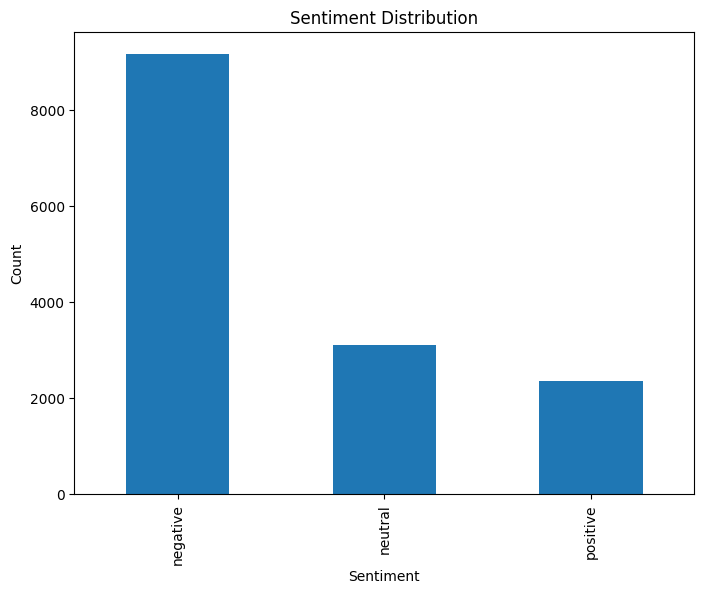

In [14]:
# Visualization of sentiment distribution
plt.figure(figsize=(8, 6))
df['airline_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [15]:
# Handling missing values and cleaning
df_cleaned = df.drop(columns=['negativereason_gold', 'tweet_coord'])
df_cleaned['negativereason'].fillna('Not Mentioned', inplace=True)

In [9]:
# Step 3: Choose Naive Bayes Algorithm
# We choose Multinomial Naive Bayes for text data
# The multinomial Naive Bayes is suitable in this case because it is efficient for discrete variables
#In this case the sentiments are discrete. 

In [37]:
'''Formulate two questions that can be answered by applying a classification method using the Naïve Bayes.
1. Can we predict the sentiments of the airline tweets?
2. Can we identify the reasons for negative comments in the tweets.'''

'Formulate two questions that can be answered by applying a classification method using the Naïve Bayes.\n1. Can we predict the sentiments of the airline tweets?\n2. Can we identify the reasons for negative comments in the tweets.'

In [17]:
# Step 4: Split Data into Features and Labels
X = df_cleaned['text']
y = df_cleaned['airline_sentiment']

In [18]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 6: Vectorize the Text Data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
# Step 7: Train Multinomial Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [21]:
# Step 8: Predict and Evaluate
y_pred = clf.predict(X_test_vectorized)
print(y_pred)

['positive' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [22]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [16]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7855191256830601
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.97      0.87      1889
     neutral       0.71      0.39      0.50       580
    positive       0.87      0.54      0.67       459

    accuracy                           0.79      2928
   macro avg       0.79      0.63      0.68      2928
weighted avg       0.78      0.79      0.76      2928



In [23]:
from wordcloud import WordCloud

In [24]:
# Combine all the text data for each sentiment
positive_text = ' '.join(df[df['airline_sentiment'] == 'positive']['text'])
negative_text = ' '.join(df[df['airline_sentiment'] == 'negative']['text'])
neutral_text = ' '.join(df[df['airline_sentiment'] == 'neutral']['text'])

In [25]:
# Create word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

In [26]:
# Plot word clouds
plt.figure(figsize=(45, 15))

<Figure size 4500x1500 with 0 Axes>

<Figure size 4500x1500 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

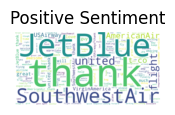

In [27]:
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

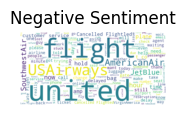

In [28]:
plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

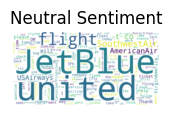

In [29]:
plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')


In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

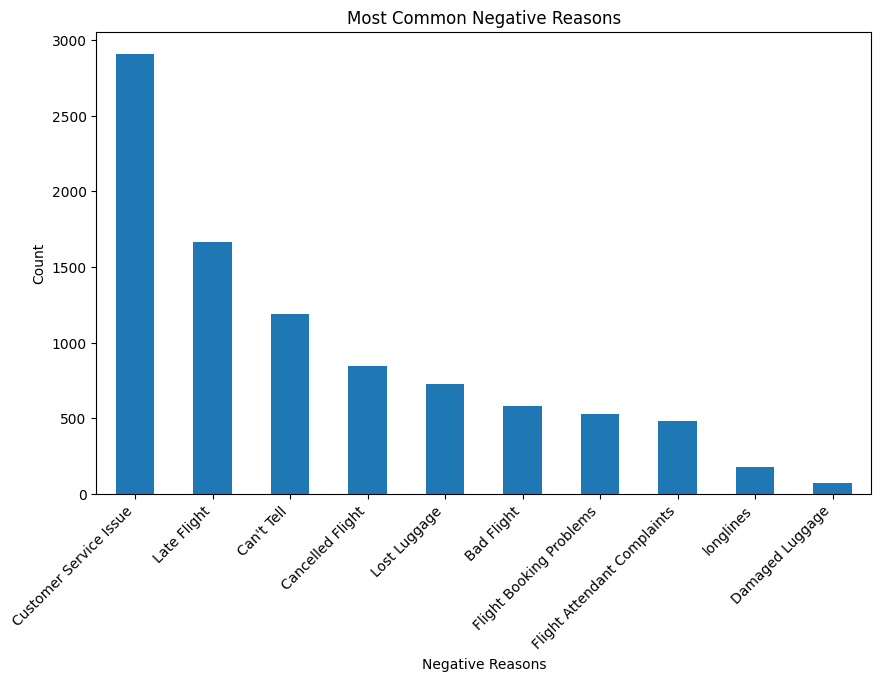

In [30]:
#Bar plot of negative reasons
plt.figure(figsize=(10, 6))
df['negativereason'].value_counts().plot(kind='bar')
plt.title('Most Common Negative Reasons')
plt.xlabel('Negative Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [24]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1828   49   12]
 [ 332  224   24]
 [ 168   43  248]]


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7855191256830601


In [33]:
# K-Fold Cross Validation:
cv_scores = cross_val_score(clf, X_train_vectorized, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76568502 0.76013658 0.75704526 0.76515798 0.74807857]
Mean CV Score: 0.7592206813325155


In [34]:
# Classification Report 
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.97      0.87      1889
     neutral       0.71      0.39      0.50       580
    positive       0.87      0.54      0.67       459

    accuracy                           0.79      2928
   macro avg       0.79      0.63      0.68      2928
weighted avg       0.78      0.79      0.76      2928



In [39]:
# 11.	Interpret the results in the context of the questions you asked.
''' To validate the model, the analysis has not utilized the ROC-AUC curve because the analysis is not intended for binary
classification. In this case, the analysis is dealing with a multicase problem with negative, positive, and neutral sentiments. 
After modeling the data, we find an accuracy score of 0.78. The score is significant, which implies that the predictions of the sentiments
match the actual sentiments correctly by 78%. A good model should have a mean cross-validation score close to 1. 
The mean cross-validation score of the model is 0.76, which is closer to 1. Therefore, the model is efficient as it has good generalization ability. 
According to the precision scores, the model is accurate by 79% when predicting negative sentiments. When the model indicates neutral sentiments, it is accurate
by 71%, and when predicting positive sentiments, it is correct by 87%. '''

' To validate the model, the analysis has not utilized the ROC-AUC curve because the analysis is not intended for binary\nclassification. In this case, the analysis is dealing with a multicase problem with negative, positive, and neutral sentiments. \nAfter modeling the data, we find an accuracy score of 0.78. The score is significant, which implies that the predictions of the sentiments\nmatch the actual sentiments correctly by 78%. A good model should have a mean cross-validation score close to 1. \nThe mean cross-validation score of the model is 0.76, which is closer to 1. Therefore, the model is efficient as it has good generalization ability. \nAccording to the precision scores, the model is accurate by 79% when predicting negative sentiments. When the model indicates neutral sentiments, it is accurate\nby 71%, and when predicting positive sentiments, it is correct by 87%. '

In [ ]:
Reference
Chauhan, N. S. (n.d.). Naïve Bayes algorithm: Everything you need to know - KDNuggets. KDnuggets. https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html